In [135]:
#import all important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import 2 miliion record
train_data = pd.read_csv('train.csv',nrows=20000)
test_data = pd.read_csv('test.csv')
train_data.head()
test_data.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [4]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  20000.000000      20000.000000     20000.000000       20000.000000   
mean      11.303321        -72.478584        39.921043         -72.497221   
std        9.541637         10.525376         6.678592          10.460530   
min       -3.000000        -74.438233       -74.006893         -84.654241   
25%        6.000000        -73.992150        40.734706         -73.991224   
50%        8.500000        -73.981711        40.752680         -73.980217   
75%       12.500000        -73.966802        40.767443         -73.963729   
max      180.000000         40.766125       401.083332          40.802437   

       dropoff_latitude  passenger_count  
count      20000.000000     20000.000000  
mean          39.913606         1.658000  
std            6.139231         1.283674  
min          -74.006377         0.000000  
25%           40.734537         1.000000  
50%           40.753583         1.000000  
75%           40.768135         2.000000  
max           41.366138         6.000000

In [5]:
train_data.shape

(20000, 8)

In [ ]:
# def memoryUsageCheck(dataset):
#     dataset.info(memory_usage='deep')

# print("memory usage for train data",memoryUsageCheck(train_data))
# print("--"*40)
# print("memory usage for test data",memoryUsageCheck(test_data))


In [ ]:
# for dtype in ['float','int','object']:
#     selected_dtype = train_data.select_dtypes(include=[dtype])
#     mean_usage_byte = selected_dtype.memory_usage(deep=True).mean()
#     mean_usage_mb = mean_usage_byte / 1024 ** 2
#     print("Average memory usage in MB for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

In [6]:
def changeDataType(dataset):
    dataset['passenger_count'] = dataset.passenger_count.astype('uint8')
    dataset['pickup_longitude'] = dataset.pickup_longitude.astype('float32')
    dataset['pickup_latitude'] = dataset.pickup_latitude.astype('float32')
    dataset['dropoff_longitude'] = dataset.dropoff_longitude.astype('float32')
    dataset['dropoff_latitude'] = dataset.dropoff_latitude.astype('float32')
    dataset['pickup_datetime'] = pd.to_datetime(arg=dataset['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
    dataset.info()
    

changeDataType(train_data)
print("--"*40)
changeDataType(test_data)

train_data['fare_amount'] = train_data.fare_amount.astype('float32')

#dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
key                  20000 non-null object
fare_amount          20000 non-null float64
pickup_datetime      20000 non-null datetime64[ns]
pickup_longitude     20000 non-null float32
pickup_latitude      20000 non-null float32
dropoff_longitude    20000 non-null float32
dropoff_latitude     20000 non-null float32
passenger_count      20000 non-null uint8
dtypes: datetime64[ns](1), float32(4), float64(1), object(1), uint8(1)
memory usage: 800.9+ KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float32
pickup_latitude      9914 non-null float32
dropoff_longitude    9914 non-null float32
dropoff_latitude     9914 non-nul

In [7]:
train_data['pickup_datetime'].head()

0   2009-06-15 17:26:21
1   2010-01-05 16:52:16
2   2011-08-18 00:35:00
3   2012-04-21 04:30:42
4   2010-03-09 07:51:00
Name: pickup_datetime, dtype: datetime64[ns]

In [8]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  20000.000000      20000.000000     20000.000000       20000.000000   
mean      11.303321        -72.478584        39.921036         -72.497223   
std        9.541637         10.525376         6.678592          10.460529   
min       -3.000000        -74.438232       -74.006889         -84.654243   
25%        6.000000        -73.992149        40.734707         -73.991226   
50%        8.500000        -73.981712        40.752680         -73.980217   
75%       12.500000        -73.966803        40.767442         -73.963728   
max      180.000000         40.766125       401.083344          40.802437   

       dropoff_latitude  passenger_count  
count      20000.000000     20000.000000  
mean          39.913605         1.658000  
std            6.139231         1.283674  
min          -74.006378         0.000000  
25%           40.734536         1.000000  
50%           40.753584         1.000000  
75%           40.768136         2.000000  
max           41.366138         6.000000

In [9]:
train_data.isnull().sum()
train_data = train_data.dropna(axis=0)
train_data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
pd.set_option('float_format', '{:f}'.format)
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 20000.000000      20000.000000     20000.000000       20000.000000   
mean     11.303321        -72.478584        39.921036         -72.497223   
std       9.541637         10.525376         6.678592          10.460529   
min      -3.000000        -74.438232       -74.006889         -84.654243   
25%       6.000000        -73.992149        40.734707         -73.991226   
50%       8.500000        -73.981712        40.752680         -73.980217   
75%      12.500000        -73.966803        40.767442         -73.963728   
max     180.000000         40.766125       401.083344          40.802437   

       dropoff_latitude  passenger_count  
count      20000.000000     20000.000000  
mean          39.913605         1.658000  
std            6.139231         1.283674  
min          -74.006378         0.000000  
25%           40.734536         1.000000  
50%           40.753584         1.000000  
75%           40.768136         2.000000  
max           41.366138         6.000000

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 19996.000000      19996.000000     19996.000000       19996.000000   
mean     11.306003        -72.478294        39.920883         -72.496933   
std       9.540692         10.526408         6.679250          10.461555   
min       0.010000        -74.438232       -74.006889         -84.654243   
25%       6.000000        -73.992149        40.734711         -73.991219   
50%       8.500000        -73.981712        40.752686         -73.980213   
75%      12.500000        -73.966803        40.767446         -73.963728   
max     180.000000         40.766125       401.083344          40.802437   

       dropoff_latitude  passenger_count  
count      19996.000000     19996.000000  
mean          39.913448         1.657982  
std            6.139835         1.283670  
min          -74.006378         0.000000  
25%           40.734546         1.000000  
50%           40.753588         1.000000  
75%           40.768139         2.000000  
max           41.366138         6.000000

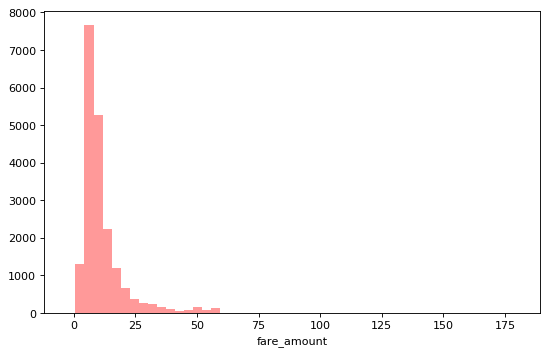

In [11]:
plt.figure(figsize=(8, 5), dpi=80)
# sns.set_style("darkgrid")
sns.distplot(train_data['fare_amount'],color='red',kde=False)
train_data = train_data.loc[train_data['fare_amount']>0]
train_data['fare_amount']
train_data.describe()


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


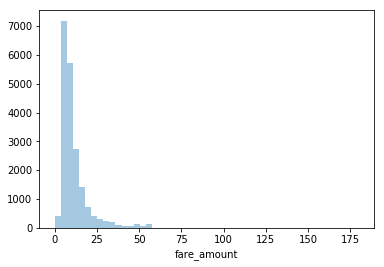

In [12]:
sns.distplot(a=train_data.fare_amount, kde=False)

In [13]:
p = pd.cut(train_data.fare_amount,3)
p.value_counts()

(-0.17, 60.007]      19956
(60.007, 120.003]       37
(120.003, 180.0]         3
Name: fare_amount, dtype: int64

In [14]:
train_data = train_data[train_data.fare_amount<400]

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


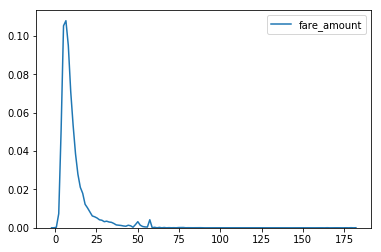

In [15]:
sns.kdeplot(data=train_data.fare_amount)

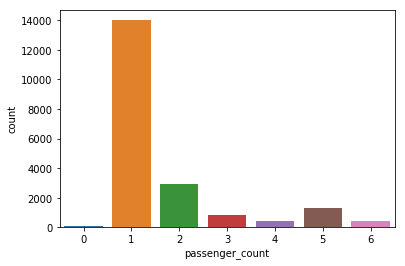

In [16]:
sns.countplot(x=train_data.passenger_count)

In [17]:
train_data.passenger_count.describe()
train_data = train_data[train_data.passenger_count<=6]

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


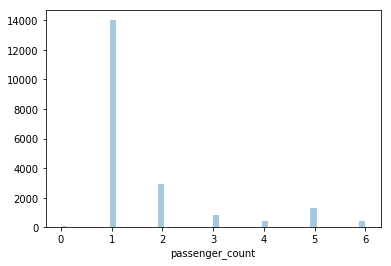

In [18]:
sns.distplot(a=train_data.passenger_count,kde=False)

In [19]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 19996.000000      19996.000000     19996.000000       19996.000000   
mean     11.306003        -72.478294        39.920883         -72.496933   
std       9.540692         10.526408         6.679250          10.461555   
min       0.010000        -74.438232       -74.006889         -84.654243   
25%       6.000000        -73.992149        40.734711         -73.991219   
50%       8.500000        -73.981712        40.752686         -73.980213   
75%      12.500000        -73.966803        40.767446         -73.963728   
max     180.000000         40.766125       401.083344          40.802437   

       dropoff_latitude  passenger_count  
count      19996.000000     19996.000000  
mean          39.913448         1.657982  
std            6.139835         1.283670  
min          -74.006378         0.000000  
25%           40.734546         1.000000  
50%           40.753588         1.000000  
75%           40.768139         2.000000  
max           41.366138         6.000000

In [20]:
train_data = train_data.drop((train_data[train_data['pickup_latitude']<-90] | (train_data[train_data['pickup_latitude']>90])).index,axis=0)
train_data = train_data.drop((train_data[train_data['pickup_longitude']<-180] | (train_data[train_data['pickup_longitude']>180])).index,axis=0)
train_data = train_data.drop((train_data[train_data['dropoff_longitude']<-180] | (train_data[train_data['dropoff_longitude']>180])).index,axis=0)
train_data = train_data.drop((train_data[train_data['dropoff_latitude']<-90] | (train_data[train_data['dropoff_latitude']>90])).index,axis=0)

In [21]:
train_data = train_data[train_data.pickup_latitude.between(test_data.pickup_latitude.min(),test_data.pickup_latitude.max())]
train_data = train_data[train_data.pickup_longitude.between(test_data.pickup_longitude.min(),test_data.pickup_longitude.max())]
train_data = train_data[train_data.dropoff_latitude.between(test_data.dropoff_latitude.min(),test_data.dropoff_latitude.max())]
train_data = train_data[train_data.dropoff_longitude.between(test_data.dropoff_longitude.min(),test_data.dropoff_longitude.max())]

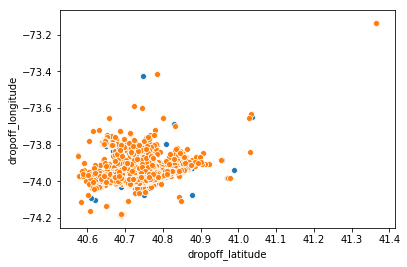

In [22]:
sns.scatterplot(x=train_data.pickup_latitude,y=train_data.pickup_longitude)
sns.scatterplot(x=train_data.dropoff_latitude,y=train_data.dropoff_longitude)

In [23]:
def degree_to_radion(degree):
    return degree*(np.pi/180)

def calculate_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    
    from_lat = degree_to_radion(pickup_latitude)
    from_long = degree_to_radion(pickup_longitude)
    to_lat = degree_to_radion(dropoff_latitude)
    to_long = degree_to_radion(dropoff_longitude)
    
    radius = 6371.01
    
    lat_diff = to_lat - from_lat
    long_diff = to_long - from_long

    a = np.sin(lat_diff / 2)**2 + np.cos(degree_to_radion(from_lat)) * np.cos(degree_to_radion(to_lat)) * np.sin(long_diff / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return radius * c

In [24]:
train_data['distance'] = calculate_distance(train_data.pickup_latitude, train_data.pickup_longitude, train_data.dropoff_latitude, train_data.dropoff_longitude)

In [25]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 19563.000000      19563.000000     19563.000000       19563.000000   
mean     11.276058        -73.974747        40.751347         -73.973953   
std       9.397710          0.040894         0.031287           0.038530   
min       0.010000        -74.181602        40.603859         -74.183952   
25%       6.000000        -73.992386        40.736481         -73.991405   
50%       8.500000        -73.982071        40.753448         -73.980614   
75%      12.500000        -73.968128        40.767857         -73.965496   
max     165.000000        -73.137390        41.366138         -73.137390   

       dropoff_latitude  passenger_count     distance  
count      19563.000000     19563.000000 19563.000000  
mean          40.751873         1.659868     3.829546  
std            0.033116         1.284871     4.804285  
min           40.574654         0.000000     0.000000  
25%           40.736238         1.000000     1.428421  
50%           40.754295         1.000000     2.439318  
75%           40.768486         2.000000     4.317827  
max           41.366138         6.000000   119.144691

In [26]:
test_data['distance'] = calculate_distance(test_data.pickup_latitude, test_data.pickup_longitude, test_data.dropoff_latitude, test_data.dropoff_longitude)

In [27]:
test_data.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974716        40.751041         -73.973656         40.751740   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252190        40.573143         -74.263245         40.568974   
25%          -73.992500        40.736125         -73.991249         40.735253   
50%          -73.982327        40.753052         -73.980015         40.754065   
75%          -73.968012        40.767113         -73.964062         40.768757   
max          -72.986534        41.709557         -72.990967         41.696682   

       passenger_count    distance  
count      9914.000000 9914.000000  
mean          1.671273    3.907951  
std           1.278747    4.721023  
min           1.000000    0.000000  
25%           1.000000    1.474358  
50%           1.000000    2.493208  
75%           2.000000    4.466233  
max           6.000000  117.564873

In [28]:
p = pd.cut(train_data.distance,10)
p.value_counts()

(-0.119, 11.914]     18485
(11.914, 23.829]       805
(23.829, 35.743]       262
(107.23, 119.145]        7
(35.743, 47.658]         2
(95.316, 107.23]         1
(47.658, 59.572]         1
(83.401, 95.316]         0
(71.487, 83.401]         0
(59.572, 71.487]         0
Name: distance, dtype: int64

In [29]:
train_data = train_data.loc[train_data.distance<200] #150

In [30]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 19563.000000      19563.000000     19563.000000       19563.000000   
mean     11.276058        -73.974747        40.751347         -73.973953   
std       9.397710          0.040894         0.031287           0.038530   
min       0.010000        -74.181602        40.603859         -74.183952   
25%       6.000000        -73.992386        40.736481         -73.991405   
50%       8.500000        -73.982071        40.753448         -73.980614   
75%      12.500000        -73.968128        40.767857         -73.965496   
max     165.000000        -73.137390        41.366138         -73.137390   

       dropoff_latitude  passenger_count     distance  
count      19563.000000     19563.000000 19563.000000  
mean          40.751873         1.659868     3.829546  
std            0.033116         1.284871     4.804285  
min           40.574654         0.000000     0.000000  
25%           40.736238         1.000000     1.428421  
50%           40.754295         1.000000     2.439318  
75%           40.768486         2.000000     4.317827  
max           41.366138         6.000000   119.144691

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


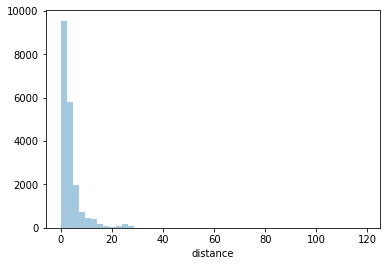

In [31]:
sns.distplot(train_data.distance,kde=False)

In [32]:
train_data = train_data.drop(columns='key')

In [33]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 19563.000000      19563.000000     19563.000000       19563.000000   
mean     11.276058        -73.974747        40.751347         -73.973953   
std       9.397710          0.040894         0.031287           0.038530   
min       0.010000        -74.181602        40.603859         -74.183952   
25%       6.000000        -73.992386        40.736481         -73.991405   
50%       8.500000        -73.982071        40.753448         -73.980614   
75%      12.500000        -73.968128        40.767857         -73.965496   
max     165.000000        -73.137390        41.366138         -73.137390   

       dropoff_latitude  passenger_count     distance  
count      19563.000000     19563.000000 19563.000000  
mean          40.751873         1.659868     3.829546  
std            0.033116         1.284871     4.804285  
min           40.574654         0.000000     0.000000  
25%           40.736238         1.000000     1.428421  
50%           40.754295         1.000000     2.439318  
75%           40.768486         2.000000     4.317827  
max           41.366138         6.000000   119.144691

In [34]:
test_data_key = test_data['key']
test_data = test_data.drop(columns='key')

In [35]:
test_data.head()

pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0 2015-01-27 13:08:24        -73.973320        40.763805         -73.981430   
1 2015-01-27 13:08:24        -73.986862        40.719383         -73.998886   
2 2011-10-08 11:53:44        -73.982521        40.751259         -73.979652   
3 2012-12-01 21:12:12        -73.981163        40.767807         -73.990448   
4 2012-12-01 21:12:12        -73.966049        40.789776         -73.988564   

   dropoff_latitude  passenger_count  distance  
0         40.743835                1  2.396713  
1         40.739201                1  2.577306  
2         40.746140                1  0.652503  
3         40.751637                1  2.073595  
4         40.744427                1  5.629659

In [36]:
data = [train_data,test_data]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [37]:
train_data.head()

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0     4.500000 2009-06-15 17:26:21        -73.844315        40.721317   
1    16.900000 2010-01-05 16:52:16        -74.016045        40.711304   
2     5.700000 2011-08-18 00:35:00        -73.982735        40.761269   
3     7.700000 2012-04-21 04:30:42        -73.987129        40.733143   
4     5.300000 2010-03-09 07:51:00        -73.968094        40.768009   

   dropoff_longitude  dropoff_latitude  passenger_count  distance  Year  \
0         -73.841614         40.712276                1  1.049563  2009   
1         -73.979271         40.782005                1  8.861133  2010   
2         -73.991241         40.750561                2  1.520738  2011   
3         -73.991570         40.758091                1  2.817965  2012   
4         -73.956657         40.783764                1  2.164433  2010   

   Month  Date  Day of Week  Hour  
0      6    15            0    17  
1      1     5            1    16  
2      8    18            3     0  
3      4    21            5     4  
4      3     9            1     7

In [38]:
test_data.head()

pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0 2015-01-27 13:08:24        -73.973320        40.763805         -73.981430   
1 2015-01-27 13:08:24        -73.986862        40.719383         -73.998886   
2 2011-10-08 11:53:44        -73.982521        40.751259         -73.979652   
3 2012-12-01 21:12:12        -73.981163        40.767807         -73.990448   
4 2012-12-01 21:12:12        -73.966049        40.789776         -73.988564   

   dropoff_latitude  passenger_count  distance  Year  Month  Date  \
0         40.743835                1  2.396713  2015      1    27   
1         40.739201                1  2.577306  2015      1    27   
2         40.746140                1  0.652503  2011     10     8   
3         40.751637                1  2.073595  2012     12     1   
4         40.744427                1  5.629659  2012     12     1   

   Day of Week  Hour  
0            1    13  
1            1    13  
2            5    11  
3            5    21  
4            5    21

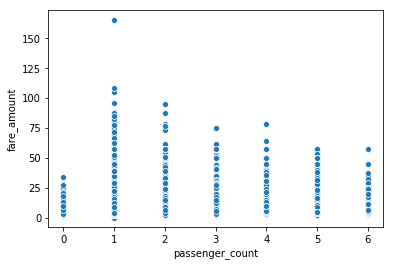

In [39]:
sns.scatterplot(x=train_data['passenger_count'],y=train_data['fare_amount'])

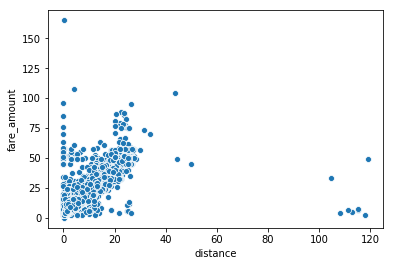

In [40]:
sns.scatterplot(x=train_data['distance'],y=train_data['fare_amount'])

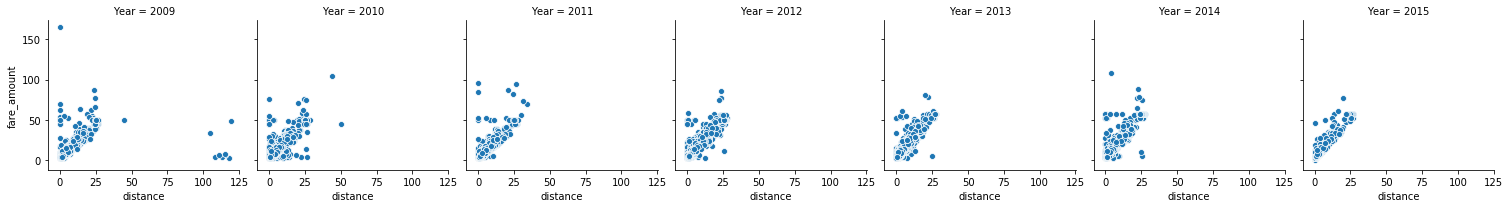

In [41]:
g = sns.FacetGrid(train_data,col='Year')
g.map(sns.scatterplot,"distance","fare_amount")

In [42]:
train_data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count 19563.000000      19563.000000     19563.000000       19563.000000   
mean     11.276058        -73.974747        40.751347         -73.973953   
std       9.397710          0.040894         0.031287           0.038530   
min       0.010000        -74.181602        40.603859         -74.183952   
25%       6.000000        -73.992386        40.736481         -73.991405   
50%       8.500000        -73.982071        40.753448         -73.980614   
75%      12.500000        -73.968128        40.767857         -73.965496   
max     165.000000        -73.137390        41.366138         -73.137390   

       dropoff_latitude  passenger_count     distance         Year  \
count      19563.000000     19563.000000 19563.000000 19563.000000   
mean          40.751873         1.659868     3.829546  2011.752441   
std            0.033116         1.284871     4.804285     1.865727   
min           40.574654         0.000000     0.000000  2009.000000   
25%           40.736238         1.000000     1.428421  2010.000000   
50%           40.754295         1.000000     2.439318  2012.000000   
75%           40.768486         2.000000     4.317827  2013.000000   
max           41.366138         6.000000   119.144691  2015.000000   

             Month         Date  Day of Week         Hour  
count 19563.000000 19563.000000 19563.000000 19563.000000  
mean      6.248121    15.679497     3.036089    13.479323  
std       3.445974     8.675601     1.964912     6.518431  
min       1.000000     1.000000     0.000000     0.000000  
25%       3.000000     8.000000     1.000000     9.000000  
50%       6.000000    16.000000     3.000000    14.000000  
75%       9.000000    23.000000     5.000000    19.000000  
max      12.000000    31.000000     6.000000    23.000000

In [43]:
train_data[(train_data.distance>100) & (train_data.fare_amount<50)]

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
1684      2.500000 2009-05-02 19:01:01        -73.137390        41.366138   
3075      6.900000 2009-01-06 10:53:36        -73.137390        41.366138   
4487      4.900000 2009-08-26 07:43:16        -73.137390        41.366138   
5663     49.150002 2009-02-25 07:05:05        -73.137390        41.366138   
7401      4.500000 2009-07-16 09:41:26        -73.900574        40.764046   
9808      6.900000 2009-08-13 23:15:28        -73.137390        41.366138   
9899      7.700000 2009-08-12 19:04:53        -73.974358        40.755169   
17081    33.470001 2009-08-21 13:51:57        -73.137390        41.366138   

       dropoff_longitude  dropoff_latitude  passenger_count   distance  Year  \
1684          -73.996513         40.745319                2 117.856644  2009   
3075          -73.974602         40.751312                1 115.495064  2009   
4487          -73.957687         40.765644                1 113.035820  2009   
5663          -74.000938         40.731724                1 119.144691  2009   
7401          -73.137390         41.366138                1 108.087044  2009   
9808          -73.952332         40.786381                1 111.203537  2009   
9899          -73.137390         41.366138                1 115.219719  2009   
17081         -73.865799         40.770828                2 104.600143  2009   

       Month  Date  Day of Week  Hour  
1684       5     2            5    19  
3075       1     6            1    10  
4487       8    26            2     7  
5663       2    25            2     7  
7401       7    16            3     9  
9808       8    13            3    23  
9899       8    12            2    19  
17081      8    21            4    13

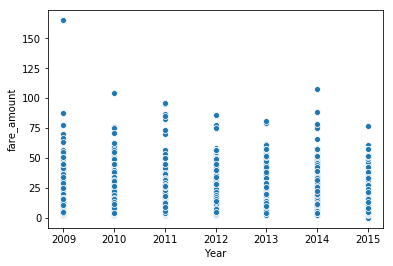

In [44]:
sns.scatterplot(x=train_data['Year'],y=train_data['fare_amount'])

In [45]:
train_data.groupby(['Month','Year']).count()['fare_amount']

Month  Year
1      2009    253
       2010    280
       2011    246
       2012    247
       2013    279
       2014    258
       2015    241
2      2009    217
       2010    199
       2011    227
       2012    283
       2013    249
       2014    236
       2015    229
3      2009    277
       2010    248
       2011    265
       2012    316
       2013    265
       2014    254
       2015    234
4      2009    242
       2010    269
       2011    262
       2012    249
       2013    284
       2014    225
       2015    212
5      2009    246
       2010    288
              ... 
8      2009    254
       2010    223
       2011    215
       2012    241
       2013    239
       2014    208
9      2009    256
       2010    232
       2011    244
       2012    246
       2013    257
       2014    240
10     2009    271
       2010    237
       2011    264
       2012    244
       2013    293
       2014    258
11     2009    254
       2010    254
       2011    239


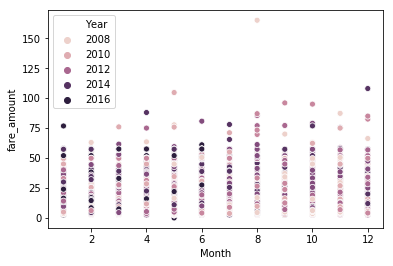

In [46]:
sns.scatterplot(x=train_data['Month'],y=train_data['fare_amount'],hue=train_data['Year'])

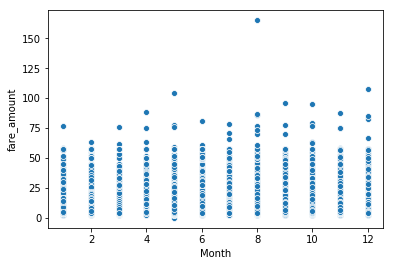

In [47]:
sns.scatterplot(x=train_data['Month'],y=train_data['fare_amount'])

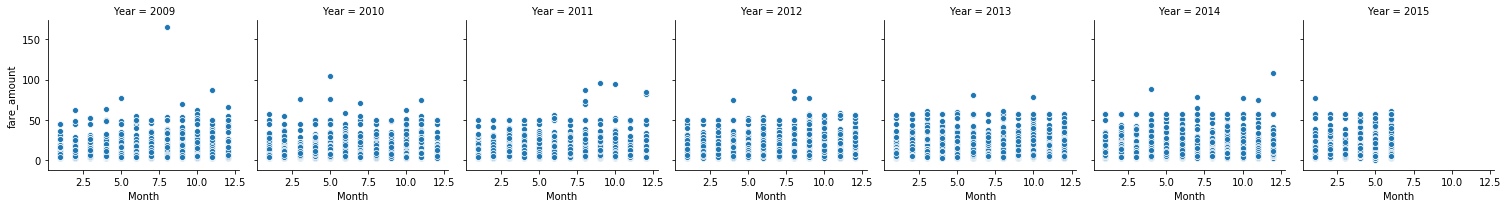

In [48]:
w = sns.FacetGrid(train_data,col='Year')
w.map(sns.scatterplot,"Month","fare_amount")

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


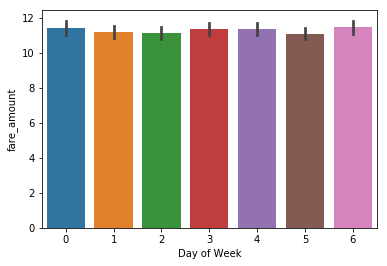

In [49]:
sns.barplot(x=train_data['Day of Week'],y=train_data['fare_amount'])

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1500x1500 with 0 Axes>

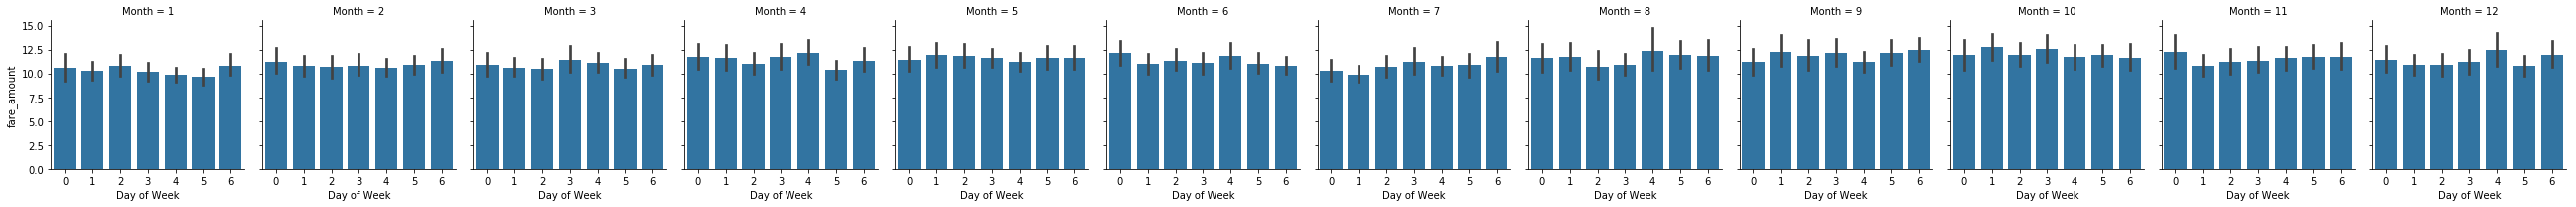

In [50]:
plt.figure(figsize=(10, 10), dpi=150)
w = sns.FacetGrid(train_data,col='Month')
w.map(sns.barplot,"Day of Week","fare_amount")

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


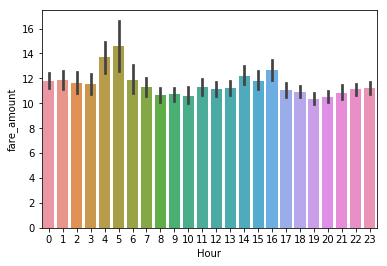

In [51]:
sns.barplot(x=train_data['Hour'],y=train_data['fare_amount'])

In [52]:
train_data = train_data.loc[train_data.pickup_latitude != 0]
train_data = train_data.loc[train_data.pickup_longitude != 0]
train_data = train_data.loc[train_data.dropoff_latitude != 0]
train_data = train_data.loc[train_data.dropoff_longitude != 0]

In [53]:
test_data = test_data.loc[test_data.pickup_latitude != 0]
test_data = test_data.loc[test_data.pickup_longitude != 0]
test_data = test_data.loc[test_data.dropoff_latitude != 0]
test_data = test_data.loc[test_data.dropoff_longitude != 0]

In [54]:
train_data = train_data.drop(columns='pickup_datetime',axis=1)
test_data = test_data.drop(columns='pickup_datetime',axis=1)

In [55]:
X = train_data.loc[:,train_data.columns != 'fare_amount']
y = train_data['fare_amount']

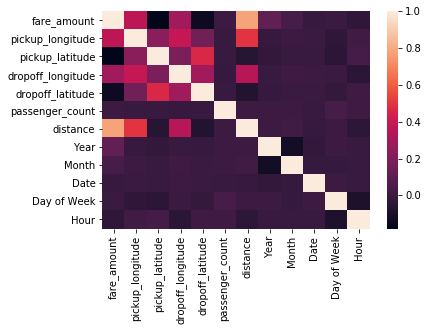

In [178]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,f1_score
from sklearn.preprocessing import StandardScaler


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# y_train = (y_train - np.mean(y_train)) / (np.std(y_train))

# y_train.skew()
# y_test.skew()
# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

# from scipy import stats

# y_train,lamb= stats.boxcox(y_train)
# y_test,lamb_test= stats.boxcox(y_test)
#y_test
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# lamb_test
# # scaler_y = StandardScaler()
# # y_train = scaler_y.fit_transform(y_train)



# scaler_test =  StandardScaler()
# X_test = scaler_test.fit_transform(X_test)
#sns.distplot(y_train)
X_train.corr()
sns.heatmap(train_data.corr())

In [180]:
train_data.var()

fare_amount         88.316950
pickup_longitude     0.001672
pickup_latitude      0.000979
dropoff_longitude    0.001485
dropoff_latitude     0.001097
passenger_count      1.650893
distance            23.081147
Year                 3.480936
Month               11.874738
Date                75.266049
Day of Week          3.860879
Hour                42.489949
dtype: float64

In [121]:
X_train.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      13694.000000     13694.000000       13694.000000      13694.000000   
mean         -73.974678        40.751259         -73.973892         40.752018   
std            0.041526         0.031736           0.039480          0.033630   
min          -74.177162        40.603859         -74.183311         40.574654   
25%          -73.992468        40.736297         -73.991400         40.736259   
50%          -73.982094        40.753454         -73.980545         40.754293   
75%          -73.968102        40.767660         -73.965387         40.768784   
max          -73.137390        41.366138         -73.137390         41.366138   

       passenger_count     distance         Year        Month         Date  \
count     13694.000000 13694.000000 13694.000000 13694.000000 13694.000000   
mean          1.655689     3.823781  2011.753907     6.208047    15.713013   
std           1.278657     4.844182     1.870227     3.435972     8.684276   
min           0.000000     0.000000  2009.000000     1.000000     1.000000   
25%           1.000000     1.426478  2010.000000     3.000000     8.000000   
50%           1.000000     2.429604  2012.000000     6.000000    16.000000   
75%           2.000000     4.293207  2013.000000     9.000000    23.000000   
max           6.000000   117.856644  2015.000000    12.000000    31.000000   

       Day of Week         Hour  
count 13694.000000 13694.000000  
mean      3.043523    13.464948  
std       1.964151     6.523492  
min       0.000000     0.000000  
25%       1.000000     9.000000  
50%       3.000000    14.000000  
75%       5.000000    19.000000  
max       6.000000    23.000000

In [149]:
ran_for_reg = RandomForestRegressor(max_depth=400)
ran_for_reg.fit(X_train,y_train)
y_ranfor_pred = ran_for_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_ranfor_pred))
error

0.24639289908810239

In [160]:
# a = ran_for_reg.predict(test_data)
# np.expm1(a)
#sns.distplot(y_train)
# error = np.sqrt(mean_squared_error(y_test,y_ranfor_pred))
# error


0.5215548

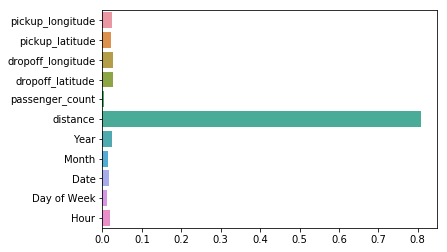

In [130]:
sns.barplot(x=ran_for_reg.feature_importances_,y=X_test.columns)

In [114]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bagreg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=10,bootstrap=True,random_state=0)
bagreg.fit(X_train,y_train)
y_bagg_pred = bagreg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_bagg_pred))
error

0.2671587387018932

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
adareg = AdaBoostRegressor(DecisionTreeRegressor())
adareg.fit(X_train,y_train)
y_adareg_pred = adareg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_adareg_pred))
error

3.998581851154335

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train,y_train)
y_gradient_pred = gradient_reg.predict(X_test)
y_gradient_pred
y_test
# error = np.sqrt(mean_squared_error(y_test,y_gradient_pred))
# error

2410    1.740466
9401    1.740466
11105   1.987874
6049    2.442347
17762   3.178054
14477   1.808289
3119    1.386294
3099    1.504077
7235    2.388763
3544    2.186051
3160    1.791759
17193   3.676301
6428    2.302585
7897    3.044523
8087    1.808289
9277    2.602690
2931    1.740466
11804   2.302585
13740   3.671225
18657   2.646175
10725   2.557227
6456    1.931521
15787   1.871802
17233   1.808289
17845   2.230014
11758   1.791759
10409   2.564949
19522   1.945910
15151   1.504077
3945    1.667707
          ...   
9890    3.619797
8773    4.048824
5761    2.079442
13337   1.931521
4022    2.397895
12887   1.987874
11815   3.349904
8783    2.140066
3226    2.890372
12410   1.704748
4175    1.871802
6582    3.058707
5685    1.410987
11500   1.740466
8466    1.808289
11967   2.803360
1300    2.140066
1253    2.272126
7656    2.079442
3501    2.708050
15585   1.871802
16890   2.873565
3510    1.667707
509     3.068053
721     2.272126
9258    1.410987
19953   2.351375
7152    4.0163

In [153]:
from xgboost import XGBRegressor
xgreg = XGBRegressor()
xgreg.fit(X_train,y_train)
y_xgreg_pred = xgreg.predict(X_test)
error = np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(y_xgreg_pred)))
error

3.84307

In [151]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train,y_train)
y_lgb_pred = model_lgb.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_lgb_pred))
error

0.2208234673174074

In [ ]:
# from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
# kfold = KFold(n_splits=10,random_state=10)
# cv_result = cross_val_score(XGBRegressor(),X,y,cv=kfold,scoring='neg_mean_squared_error')
# cv_result 

In [ ]:
# np.sqrt(sum(cv_result * -1)/len(cv_result))

In [ ]:
#y_pred_final = xgreg.predict(test_data)

# submission = pd.DataFrame(
#     {'key': test_data_key, 'fare_amount': y_pred_final},
#     columns = ['key', 'fare_amount'])
# submission.to_csv('submission.csv', index = False)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [71]:
# a stacking function which divides training and testing data and findouts prediction

n_folds=5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X_train,y_train,scoring='neg_mean_squared_error',cv=kf))
    return rmse


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [68]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [69]:
import lightgbm as lgb
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [72]:
score = rmsle_cv(GBoost)
print("\Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\Gradient Boosting score: 4.0429 (0.5570)



In [73]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 4.2284 (0.4703)



In [74]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 4.1774 (0.4100)



In [75]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AverageModel(BaseEstimator):
    def __init__(self,models):
        self.models = models
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=1)

In [76]:
average_model = AverageModel(models=(GBoost, model_xgb, model_lgb))
score = rmsle_cv(average_model)
score

array([3.4468821 , 4.08288737, 4.73451311, 4.11836763, 3.57519366])

In [77]:
score.mean()

3.9915687741668044

In [78]:
class stackingModel(BaseEstimator):
    def __init__(self,base_model, meta_model, k_fold=5):
        self.base_model = base_model
        self.meta_model = meta_model
        self.k_fold = k_fold
    
    def fit(self,X,y):
        kfold = KFold(n_splits=self.k_folds, shuffle=True, random_state=156)
        out_of_fold_predictions = np.zeros((X.shape[0],len(self.base_models)))
        for i, model in enumerate(self.base_model):
            for train_index,holdout_index in kfold.split(X,y):
                model.fit(X[train_index],y[train_index])
                y_pred = model.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        return self
    
    def predict(self,X):
        meta_feature = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                                       for base_models in self.base_model])
        return self.meta_model.predict(meta_features)


In [80]:
#just checking....

base_model = [gradient_reg,xgreg,model_lgb]

def test1(X,y):
    kfold = KFold(n_splits=5,shuffle=True)
    out_of_fold_predictions = np.zeros((X.shape[0],len(base_model)))
    for i, model in enumerate(base_model):
            for train_index,holdout_index in kfold.split(X,y):
                    model.fit(X.iloc[train_index],y.iloc[train_index])
                    y_pred = model.predict(X.iloc[holdout_index])
                    out_of_fold_predictions[holdout_index, i] = y_pred
    return out_of_fold_predictions
    
out_of_fold_predictions = test1(X_train,y_train)

out_of_fold_predictions

array([[ 5.18731666,  5.2203021 ,  5.49819555],
       [ 6.95497209,  6.99315357, 31.55168106],
       [ 6.35956298,  6.50264549,  7.33768596],
       ...,
       [ 6.90196189,  6.78346872,  6.74860644],
       [14.02123238, 13.74664688, 12.83998376],
       [10.13592865, 10.0772419 ,  9.76980927]])

In [81]:
#meta model training
meta_model = lgb.LGBMRegressor()
meta_model.fit(out_of_fold_predictions,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [82]:
#meta_model.predict(np.column_stack([]))
base_model = [gradient_reg,xgreg,model_lgb]
feature_data = np.column_stack([ np.column_stack([model.predict(test_data) for model in base_model]).mean(axis=1) for base_models in base_model])

In [85]:
meta_y = meta_model.predict(feature_data)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


fare_amount          3.207464
pickup_longitude     7.594104
pickup_latitude      4.150360
dropoff_longitude    6.175292
dropoff_latitude     2.357939
passenger_count      2.031442
distance             6.972137
Year                 0.059038
Month                0.117479
Date                 0.015873
Day of Week         -0.034261
Hour                -0.422340
dtype: float64

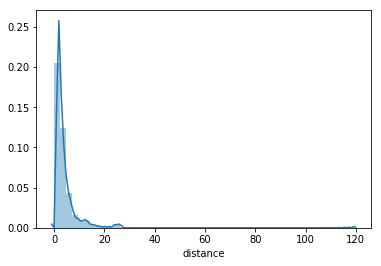

In [107]:
# error = np.sqrt(mean_squared_error(y_test,meta_y))
# error
#sns.distplot(train_data['distance'])
train_data.skew()

In [89]:
submission = pd.DataFrame(
    {'key': test_data_key, 'fare_amount': meta_y},
    columns = ['key', 'fare_amount'])
#meta_y
submission.to_csv('submission.csv', index = False)